In [0]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt


In [0]:
(train_image, train_labels),(test_image, test_labels) =mnist.load_data()

In [3]:
train_image.shape

(60000, 28, 28)

In [4]:
max([max(sequence) for sequence in train_image[1]])

255

In [5]:
max([max(sequence) for sequence in test_image[0]])

255

In [0]:
model =models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))


# Architecture of the convolutional network

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


# Adding classifiers

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [0]:
train_image =train_image.reshape((60000, 28,28,1))
train_image =train_image.astype('float32') /255
test_image =test_image.reshape((10000, 28,28, 1))
test_image =test_image.astype('float') /25

In [0]:
train_labels =to_categorical(train_labels)
test_labels =to_categorical(test_labels)

In [0]:
model.compile(optimizer ='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
model.fit(train_image, train_labels, epochs=50, batch_size=64)

Epoch 1/50
60000/60000 [==============================] - 44s 736us/step - loss: 0.1726 - accuracy: 0.9462
Epoch 2/50
60000/60000 [==============================] - 43s 721us/step - loss: 0.0467 - accuracy: 0.9856
Epoch 3/50
60000/60000 [==============================] - 42s 708us/step - loss: 0.0318 - accuracy: 0.9899
Epoch 4/50
60000/60000 [==============================] - 47s 781us/step - loss: 0.0238 - accuracy: 0.9928
Epoch 5/50
60000/60000 [==============================] - 42s 699us/step - loss: 0.0180 - accuracy: 0.9944
Epoch 6/50
60000/60000 [==============================] - 42s 707us/step - loss: 0.0157 - accuracy: 0.9953
Epoch 7/50
60000/60000 [==============================] - 42s 692us/step - loss: 0.0128 - accuracy: 0.9962
Epoch 8/50
60000/60000 [==============================] - 42s 693us/step - loss: 0.0115 - accuracy: 0.9964
Epoch 9/50
60000/60000 [==============================] - 41s 686us/step - loss: 0.0096 - accuracy: 0.9973
Epoch 10/50
60000/60000 [============

In [14]:
test_loss, test_accu =model.evaluate(test_image, test_labels)

10000/10000 [==============================] - 2s 242us/step


In [15]:
test_loss

4.738394354276708

# we had an accuracy of the test as 98%

In [40]:
test_accu

0.9807999730110168

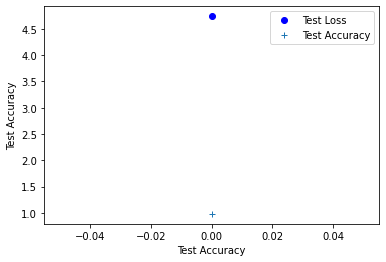

In [24]:
plt.plot(test_loss, 'bo', label=('Test Loss'))
plt.plot(test_accu, '+', label=('Test Accuracy'))
plt.xlabel('Test Accuracy')
plt.ylabel('Test Accuracy')
plt.legend()

In [0]:
model_dict =model.history

In [31]:
model_dict.keys()

dict_keys(['loss', 'accuracy'])

In [0]:
test_loss =model_dict['loss']
test_accuracy =model_dict['accuracy']

In [33]:
test_loss

[0.17263404471427202,
 0.046675869607242446,
 0.03177251768313969,
 0.023808126559904,
 0.017952867237385362,
 0.01570645039778028,
 0.01280887202898278,
 0.01151392670266032,
 0.009575041860797016,
 0.008443781366753259,
 0.007267868094519205,
 0.005385508924660745,
 0.005599691186988363,
 0.005555386657775595,
 0.0045693683731928714,
 0.004645696635249097,
 0.004291422066231513,
 0.0033864299582555654,
 0.003430879691242306,
 0.003931739058272834,
 0.0025352295393935888,
 0.003144515927890206,
 0.002379949324740125,
 0.0030949929146545617,
 0.0029445965797417627,
 0.003354314288419716,
 0.0029460898063479136,
 0.0033395526629463952,
 0.0030581919345296403,
 0.0016920611472242878,
 0.00215302374303426,
 0.0028680469426507313,
 0.003035823623865817,
 0.0016813392545309295,
 0.0030929119562856464,
 0.0028720906533019285,
 0.0016787178324857229,
 0.00165525998380343,
 0.0020933205073497855,
 0.001251487322877081,
 0.0015088807234375566,
 0.0021338495555480123,
 0.00278858189851457,
 0.00

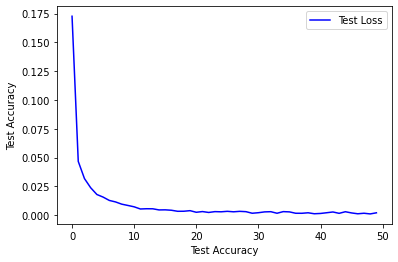

In [36]:
plt.plot(test_loss, 'b', label=('Test Loss'))
plt.xlabel('Test Accuracy')
plt.ylabel('Test Accuracy')
plt.legend()

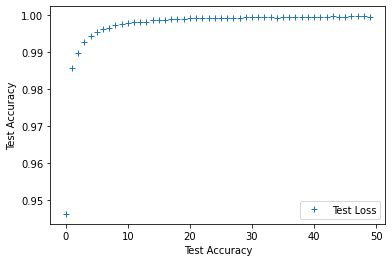

In [39]:
plt.plot(test_accuracy, '+', label=('Test Loss'))
plt.xlabel('Test Accuracy')
plt.ylabel('Test Accuracy')
plt.legend()